In [5]:
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
DIRECTORY = "/kaggle/input/coleafds/CoLeaf DATASET"

# Image Data Generator with augmentation for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 903 images belonging to 10 classes.
Found 95 images belonging to 10 classes.


Epoch 1/50
 1/10 ━━━━━━━━━━━━━━━━━━━━ 6:23 43s/step - accuracy: 0.1406 - loss: 2.3027

W0000 00:00:1716270173.888649     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 8/10 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.1777 - loss: 2.2329

W0000 00:00:1716270229.029030     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 100s 6s/step - accuracy: 0.1909 - loss: 2.2136 - val_accuracy: 0.2526 - val_loss: 2.0321
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 777ms/step - accuracy: 0.2498 - loss: 2.1230 - val_accuracy: 0.3053 - val_loss: 1.9110
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.2943 - loss: 2.0132 - val_accuracy: 0.4211 - val_loss: 1.6502
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 805ms/step - accuracy: 0.2680 - loss: 1.9682 - val_accuracy: 0.2947 - val_loss: 1.7112
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.3674 - loss: 1.7876 - val_accuracy: 0.4211 - val_loss: 1.6003
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 789ms/step - accuracy: 0.3754 - loss: 1.7228 - val_accuracy: 0.3579 - val_loss: 1.6774
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.3706 - loss: 1.7040 - val_accuracy: 0.4316 - val_loss: 1.5023
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 843ms/step - accuracy: 0.3496 - loss: 1.7314 - val_accuracy: 0.4316 - val_loss: 1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        32,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,544 (720.88 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,030 (480.59 KB)

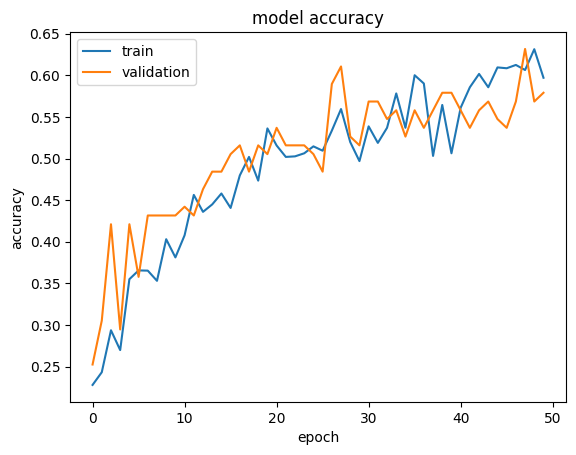

In [6]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Measure the training time
start_time = time.time()
hist= model.fit(train_generator, epochs=50, steps_per_epoch=10, validation_data=validation_generator, verbose=1)
end_time = time.time()

training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Display the model summary
model.summary()

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [1]:
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
DIRECTORY = "/kaggle/input/coleafds/CoLeaf DATASET"

# Image Data Generator with augmentation for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

2024-05-21 07:20:58.336977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 07:20:58.337072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 07:20:58.473297: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 903 images belonging to 10 classes.
Found 95 images belonging to 10 classes.


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716276267.534529     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716276267.642887     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 6/10 ━━━━━━━━━━━━━━━━━━━━ 1:06 17s/step - accuracy: 0.2999 - loss: 2.0008

W0000 00:00:1716276350.601786     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3619 - loss: 1.8505  

W0000 00:00:1716276371.447986     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 289s 13s/step - accuracy: 0.3725 - loss: 1.8231 - val_accuracy: 0.0737 - val_loss: 2.3859
Epoch 2/50


W0000 00:00:1716276381.359884     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 5/10 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6026 - loss: 1.2104

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 946ms/step - accuracy: 0.6091 - loss: 1.1695 - val_accuracy: 0.0000e+00 - val_loss: 2.5872
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.7320 - loss: 0.8261 - val_accuracy: 0.0000e+00 - val_loss: 2.7257
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 954ms/step - accuracy: 0.7651 - loss: 0.7355 - val_accuracy: 0.0000e+00 - val_loss: 2.7244
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.7694 - loss: 0.6029 - val_accuracy: 0.0000e+00 - val_loss: 2.7170
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 945ms/step - accuracy: 0.8259 - loss: 0.4945 - val_accuracy: 0.0000e+00 - val_loss: 2.7187
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 6s/step - accuracy: 0.8322 - loss: 0.4694 - val_accuracy: 0.0000e+00 - val_loss: 2.6621
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 940ms/step - accuracy: 0.8495 - loss: 0.4854 - val_accuracy: 0.0000e+00 - val_loss: 2.6949
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.8882 - loss: 0.3332 - val_acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,103,099 (46.17 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,040,718 (30.67 MB)

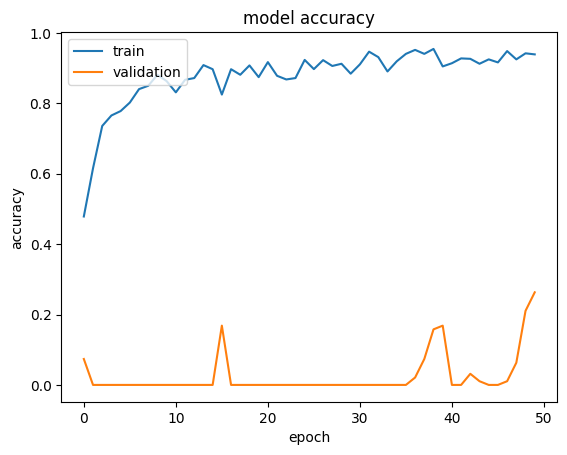

In [2]:
# Build the model using EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
hist= model.fit(train_generator, epochs=50, steps_per_epoch=10, validation_data=validation_generator, verbose=1)
end_time = time.time()

training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Display the model summary
model.summary()

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)